In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import os
import shutil
from keras.preprocessing import image
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
from keras.preprocessing import image

In [8]:
import glob
import numpy as np
cat = glob.glob('C:/Users/ronit/Downloads/dogcat_dataset/dogvscat/train/0/*.*')
dog = glob.glob('C:/Users/ronit/Downloads/dogcat_dataset/dogvscat/train/1/*.*')


data = []
labels = []

for i in cat:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(0)
for i in dog:   
    image=tf.keras.preprocessing.image.load_img(i, color_mode='rgb', 
    target_size= (64,64))
    image=np.array(image)
    data.append(image)
    labels.append(1)


data = np.array(data)
labels = np.array(labels)

from sklearn.model_selection import train_test_split
X_train, X_test, ytrain, ytest = train_test_split(data, labels, test_size=0.2,
                                                random_state=42)

In [9]:
cnn = tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [5]:
cnn.fit(x = data, validation_data = test_set, epochs = 40)
cnn.fit(X_train, y_train)

NameError: name 'test_set' is not defined

In [10]:
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [11]:
# Train the model
cnn.fit(X_train, ytrain, batch_size=128, epochs=20, validation_data=(X_test, ytest))


Epoch 1/20
4/4 [==============================] - 12s 616ms/step - loss: 0.7108 - accuracy: 0.5350 - val_loss: 0.7444 - val_accuracy: 0.4600
Epoch 2/20
4/4 [==============================] - 0s 28ms/step - loss: 0.7069 - accuracy: 0.5100 - val_loss: 0.6991 - val_accuracy: 0.4600
Epoch 3/20
4/4 [==============================] - 0s 46ms/step - loss: 0.6859 - accuracy: 0.5425 - val_loss: 0.6903 - val_accuracy: 0.5300
Epoch 4/20
4/4 [==============================] - 0s 59ms/step - loss: 0.6767 - accuracy: 0.7025 - val_loss: 0.6981 - val_accuracy: 0.4700
Epoch 5/20
4/4 [==============================] - 0s 28ms/step - loss: 0.6653 - accuracy: 0.5450 - val_loss: 0.6813 - val_accuracy: 0.5800
Epoch 6/20
4/4 [==============================] - 0s 61ms/step - loss: 0.6430 - accuracy: 0.6050 - val_loss: 0.7067 - val_accuracy: 0.4900
Epoch 7/20
4/4 [==============================] - 0s 19ms/step - loss: 0.6123 - accuracy: 0.6675 - val_loss: 0.6809 - val_accuracy: 0.5500
Epoch 8/20
4/4 [=========

keras is no longer supported, please use tf.keras instead.
Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
`tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.


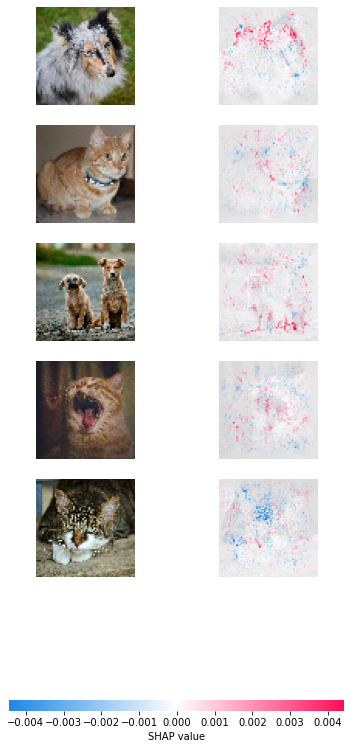

In [12]:
import shap
explainer = shap.DeepExplainer(cnn, X_test[:5])
shap_values = explainer.shap_values(X_test[:5])

# Visualize SHAP values for test images
shap.image_plot(shap_values, X_test[:5])

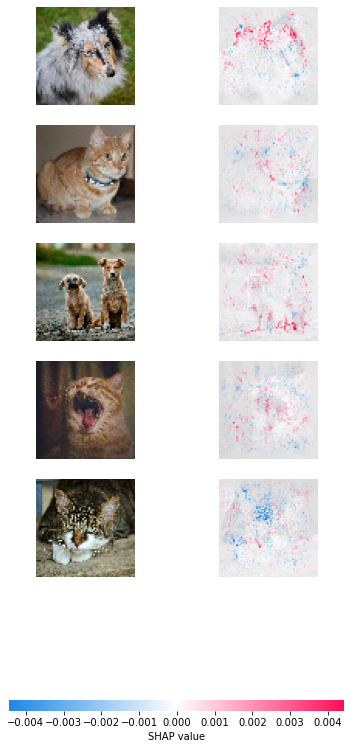

In [13]:

import shap
explainer = shap.DeepExplainer(cnn, X_test[:5])
shap_values = explainer.shap_values(X_test[:5])

# Visualize SHAP values for test images
shap.image_plot(shap_values, X_test[:5])

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the training set directory
training_set_dir = 'C:/Users/ronit/Downloads/dogcat_dataset/dogvscat/train'

# Define the data generator for the training set
train_datagen = ImageDataGenerator(rescale=1./255)

# Load the training set from directory
training_set = train_datagen.flow_from_directory(
    training_set_dir,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary'
)

Found 500 images belonging to 2 classes.


In [28]:
from PIL import Image

# Load the image from file
img = Image.open('C:/Users/ronit/Downloads/dogcat_dataset/dogvscat/train/0/217.jpg')

# Resize the image
img_resized = img.resize((64, 64))

# Convert the image to a NumPy array
img_array = np.array(img_resized)

# Expand the dimensions of the image array
img_array = np.expand_dims(img_array, axis=0)

result = cnn.predict(img_array)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'cat'
else:
    prediction = 'dog'
print("Before FGSM attack ",prediction)

Before FGSM attack  cat


In [29]:
from keras.preprocessing import image
epsilon = 0.1
data_format = 'channels_last'
img_path = 'C:/Users/ronit/Downloads/dogcat_dataset/dogvscat/train/0/216.jpg'
img = image.load_img(img_path, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x /= 255.

In [30]:
x = tf.convert_to_tensor(x, dtype=tf.float32)
y_true = tf.convert_to_tensor([0], dtype=tf.float32)
loss_object = tf.keras.losses.BinaryCrossentropy()
with tf.GradientTape() as tape:
    tape.watch(x)
    prediction = cnn(x)
    loss = loss_object(y_true, prediction)
grads = tape.gradient(loss, x)


In [31]:
perturbation = epsilon * tf.sign(grads)
perturbed_x = x + perturbation
perturbed_x = tf.clip_by_value(perturbed_x, 0, 1)

In [32]:
prediction = cnn(perturbed_x).numpy()[0][0]
if prediction > 0.5:
    label = 'dog'
else:
    label = 'cat'
print('Prediction after FGSM attack:', label)

Prediction after FGSM attack: dog


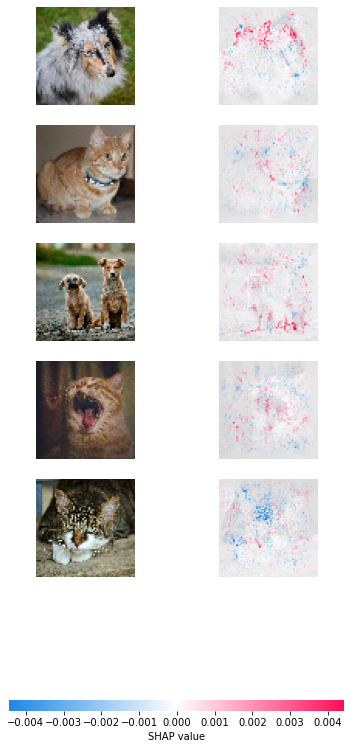

In [33]:

import shap
explainer = shap.DeepExplainer(cnn, X_test[:5])
shap_values = explainer.shap_values(X_test[:5])

# Visualize SHAP values for test images
shap.image_plot(shap_values, X_test[:5])

In [40]:
from keras.preprocessing import image

epsilon = 0.1
data_format = 'channels_last'
loss_object = tf.keras.losses.BinaryCrossentropy()

perturbed_images = []
for img in X_test:
    x = np.expand_dims(img, axis=0)
    x /= 255.
    x = tf.convert_to_tensor(x, dtype=tf.float32)
    y_true = tf.convert_to_tensor([0], dtype=tf.float32)

    with tf.GradientTape() as tape:
        tape.watch(x)
        prediction = cnn(x)
        loss = loss_object(y_true, prediction)
    grads = tape.gradient(loss, x)
    perturbation = epsilon * tf.sign(grads)
    perturbed_x = x + perturbation
    perturbed_x = tf.clip_by_value(perturbed_x, 0, 1)

    perturbed_image = perturbed_x.numpy()[0]
    perturbed_image *= 255.
    perturbed_image = perturbed_image.astype('uint8')
    perturbed_images.append(perturbed_image)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


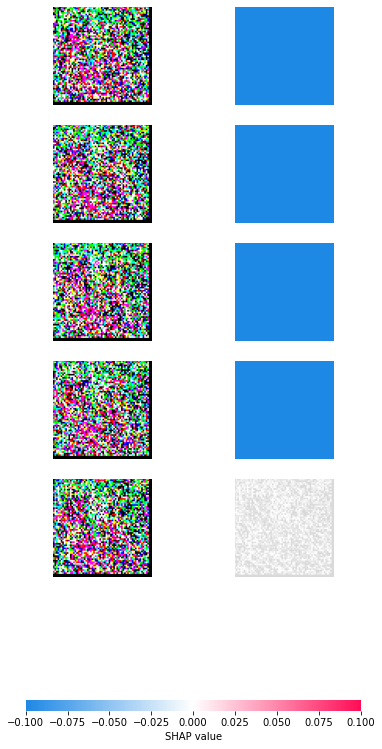

In [52]:
import shap
perturbed_images = np.array(perturbed_images, dtype=X_test.dtype)
explainer = shap.DeepExplainer(cnn, perturbed_images[:5])
shap_values = explainer.shap_values(perturbed_images[:5])

# Visualize SHAP values for test images
shap.image_plot(shap_values, perturbed_images[:5])

In [43]:
X_test

array([[[[1.1072665e-03, 1.1380239e-03, 1.5378702e-05],
         [9.8423695e-04, 1.2764322e-03, 1.5378702e-05],
         [9.0734335e-04, 1.3071896e-03, 3.0757402e-04],
         ...,
         [1.2149174e-03, 1.5378700e-03, 6.7666284e-04],
         [1.1072665e-03, 1.4455979e-03, 4.4598232e-04],
         [1.0149943e-03, 1.3994618e-03, 3.8446751e-04]],

        [[7.9969241e-04, 1.0303730e-03, 3.0757405e-05],
         [9.2272204e-04, 1.1841600e-03, 3.5371011e-04],
         [8.3044986e-04, 1.1226452e-03, 2.7681663e-04],
         ...,
         [1.1995387e-03, 1.5532487e-03, 7.5355632e-04],
         [1.1380239e-03, 1.4302192e-03, 4.1522493e-04],
         [1.1380239e-03, 1.3994618e-03, 3.2295272e-04]],

        [[8.1507111e-04, 1.1226452e-03, 2.1530181e-04],
         [1.0149943e-03, 1.1687813e-03, 3.6908881e-04],
         [8.6120726e-04, 1.1687813e-03, 7.6893506e-05],
         ...,
         [1.1841600e-03, 1.2764322e-03, 2.9219533e-04],
         [1.2610535e-03, 1.3687044e-03, 2.9219533e-04],
  

In [48]:
X_test.dtype

dtype('float32')